<a href="https://colab.research.google.com/github/rodeoai/The-AI-Handbook-Series/blob/main/AI_Model_Handbook_Chap_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Model Handbook 
## Chapter 3: Unsupervised Machine Learning Models

In [ ]:
import pandas as pd
stockdata=pd.read_csv(data_directory+'dow_jones_index.data')  

In [ ]:
stockdata.date=pd.to_datetime(stockdata.date).dt.date

In [ ]:
stockdata.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [ ]:
set(stockdata.stock)

{'AA',
 'AXP',
 'BA',
 'BAC',
 'CAT',
 'CSCO',
 'CVX',
 'DD',
 'DIS',
 'GE',
 'HD',
 'HPQ',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'KRFT',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'PFE',
 'PG',
 'T',
 'TRV',
 'UTX',
 'VZ',
 'WMT',
 'XOM'}

In [ ]:
stockdata1=stockdata.pivot(index='date',columns='stock')['percent_change_price']
stockdata2=stockdata.pivot(index='stock',columns='date')['percent_change_price']

X1=stockdata1
X2=stockdata2

In [ ]:
stockdata0=stockdata.loc[:,['percent_change_price']]

In [ ]:
stockdata0.index=stockdata['stock']

In [ ]:
stockdata0.head()
X0=stockdata0

In [ ]:
stockdata1.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,HD,HPQ,IBM,INTC,JNJ,JPM,KO,KRFT,MCD,MMM,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-07,3.79267,2.448040,4.88284,2.88809,-0.688705,2.542790,-0.512765,-0.579421,4.531000,-0.32450,-2.329550,6.79773,0.489097,-1.665870,-0.047900,1.488370,-4.493020,-1.794710,-3.540860,-0.599424,2.920910,1.960780,3.615820,0.170834,-2.796500,-4.920660,-0.138906,-0.36051,-0.276600,2.536630
2011-01-14,-4.42849,4.638010,0.93633,7.62174,0.858277,1.289400,2.067070,3.105590,0.717765,1.12843,5.064400,3.09853,2.040820,1.786580,0.417402,3.790150,0.685805,1.391140,-0.255892,2.800470,-8.132040,0.354610,0.658617,1.754660,-0.385424,2.842620,1.034880,-2.98222,2.162160,3.607080
2011-01-21,-2.47066,-0.065175,1.15721,-5.50398,-1.497450,-2.356270,0.903809,-2.382390,1.714870,4.00421,1.501250,2.36238,3.791220,-0.998573,0.723356,0.599733,-0.696092,-0.191022,0.482251,1.650730,-0.498973,-0.497159,0.054496,0.396040,-0.770578,0.695716,1.160440,-1.21538,1.125020,1.529760
2011-01-28,1.63831,-4.755700,-3.20190,-4.56140,3.203540,0.431862,-0.553840,3.819160,-1.992940,1.35474,0.658256,-2.52731,2.438550,2.044700,-4.076090,-1.481970,-1.049790,-2.739730,-1.306400,-1.984080,-2.706680,-0.963597,-0.981997,-2.579670,-3.408290,1.215090,1.457760,2.15023,2.365050,0.177552
2011-02-04,5.93325,-0.702470,3.06093,4.23049,3.599290,5.351170,3.473630,4.745760,4.277660,2.13612,-0.888769,4.44836,3.028020,0.603248,1.130320,0.405314,0.385109,2.161810,0.338753,0.409417,-1.201560,0.000000,6.102250,-1.149960,2.005840,2.866870,0.880196,1.87991,-0.744021,4.204200


In [ ]:
stockdata2.head()

date,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-21,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24
stock,,,,,,,,,,,,,,,,,,,,,,,,,
AA,3.792670,-4.428490,-2.470660,1.63831,5.93325,0.230814,-0.632547,-1.766780,-1.368230,-3.317250,1.003130,4.33455,1.984820,2.870260,-8.527130,3.72861,0.354191,-0.694847,-0.349650,-4.35294,3.258150,-4.84160,-4.02010,-3.72793,3.817310
AXP,2.448040,4.638010,-0.065175,-4.75570,-0.70247,6.346680,-1.917280,-3.137520,-0.022868,0.957592,0.706794,1.87709,-0.395257,1.468980,-0.237274,2.74809,4.005090,1.681180,-1.138630,3.58155,0.768624,-4.10586,-2.82923,1.12594,-0.020682
BA,4.882840,0.936330,1.157210,-3.20190,3.06093,0.993980,0.467675,-0.069109,-0.924520,0.055866,-2.908530,4.33917,0.693878,0.122649,-1.425660,3.74037,5.654880,-1.294340,-0.353045,-1.44928,0.574788,-3.80463,-2.76886,1.50561,-3.650620
BAC,2.888090,7.621740,-5.503980,-4.56140,4.23049,1.791870,-0.135410,-1.251740,-1.051160,1.410440,-1.542780,-6.05634,-0.372578,0.597015,-5.037040,-2.22399,-0.324675,-0.404531,-2.850160,-2.60723,1.918050,-4.97051,-3.39893,-1.92837,-0.661001
CAT,-0.688705,0.858277,-1.497450,3.20354,3.59929,3.934950,2.220930,-2.727450,0.311526,-3.287570,2.407640,2.04864,3.268210,-3.454950,-2.554080,3.63705,5.648110,-5.075710,-4.034300,-1.45461,3.257650,-4.99013,-3.45137,-1.01104,3.648050


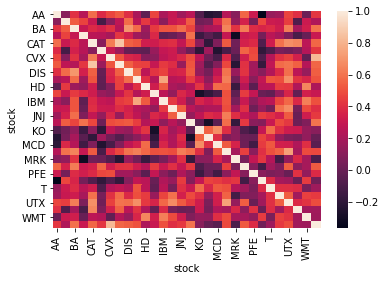

In [ ]:
sns.heatmap(stockdata1.corr())

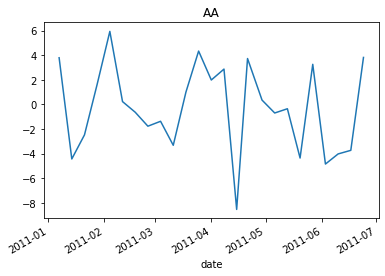

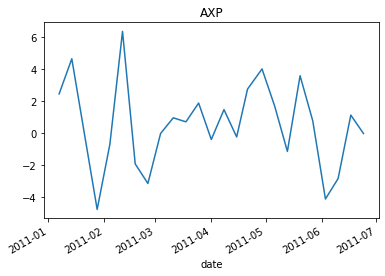

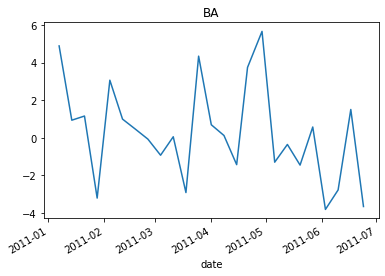

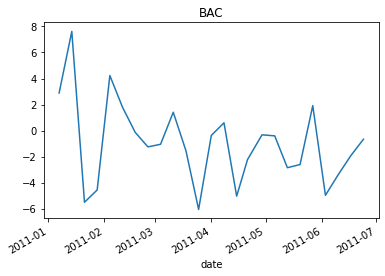

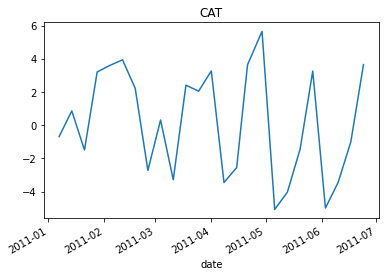

In [ ]:
for i in range(5):
  stockdata1[stockdata1.columns[i]].plot()
  plt.title(stockdata1.columns[i])
  plt.show()

In [ ]:
retvoltable=pd.concat([stockdata1.mean(),stockdata1.std(),stockdata1.skew(),stockdata1.kurtosis()],axis=1)
retvoltable.columns=['return','volatility','skew','kurtosis']

X3=retvoltable

In [ ]:
X3.head()

,return,volatility,skew,kurtosis
stock,,,,
AA,-0.302084,3.588814,-0.269700,-0.474419
AXP,0.521029,2.678678,0.015810,0.019810
BA,0.253427,2.613224,0.383238,-0.366092
BAC,-0.976965,3.218526,0.639024,0.788749
CAT,0.152660,3.259750,-0.103655,-1.397139


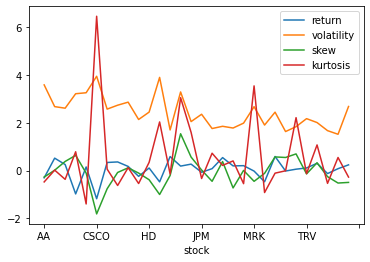

In [ ]:
X3.plot()

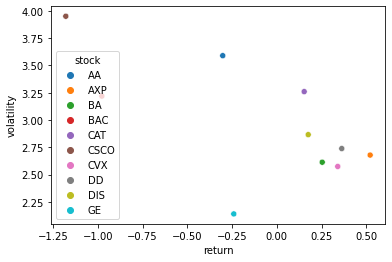

In [ ]:
import seaborn as sns

sns.scatterplot(data=X3.iloc[:10], x='return',y='volatility', hue=X3.iloc[:10].index)

In [ ]:
X1.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,HD,HPQ,IBM,INTC,JNJ,JPM,KO,KRFT,MCD,MMM,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-07,3.79267,2.448040,4.88284,2.88809,-0.688705,2.542790,-0.512765,-0.579421,4.531000,-0.32450,-2.329550,6.79773,0.489097,-1.665870,-0.047900,1.488370,-4.493020,-1.794710,-3.540860,-0.599424,2.920910,1.960780,3.615820,0.170834,-2.796500,-4.920660,-0.138906,-0.36051,-0.276600,2.536630
2011-01-14,-4.42849,4.638010,0.93633,7.62174,0.858277,1.289400,2.067070,3.105590,0.717765,1.12843,5.064400,3.09853,2.040820,1.786580,0.417402,3.790150,0.685805,1.391140,-0.255892,2.800470,-8.132040,0.354610,0.658617,1.754660,-0.385424,2.842620,1.034880,-2.98222,2.162160,3.607080
2011-01-21,-2.47066,-0.065175,1.15721,-5.50398,-1.497450,-2.356270,0.903809,-2.382390,1.714870,4.00421,1.501250,2.36238,3.791220,-0.998573,0.723356,0.599733,-0.696092,-0.191022,0.482251,1.650730,-0.498973,-0.497159,0.054496,0.396040,-0.770578,0.695716,1.160440,-1.21538,1.125020,1.529760
2011-01-28,1.63831,-4.755700,-3.20190,-4.56140,3.203540,0.431862,-0.553840,3.819160,-1.992940,1.35474,0.658256,-2.52731,2.438550,2.044700,-4.076090,-1.481970,-1.049790,-2.739730,-1.306400,-1.984080,-2.706680,-0.963597,-0.981997,-2.579670,-3.408290,1.215090,1.457760,2.15023,2.365050,0.177552
2011-02-04,5.93325,-0.702470,3.06093,4.23049,3.599290,5.351170,3.473630,4.745760,4.277660,2.13612,-0.888769,4.44836,3.028020,0.603248,1.130320,0.405314,0.385109,2.161810,0.338753,0.409417,-1.201560,0.000000,6.102250,-1.149960,2.005840,2.866870,0.880196,1.87991,-0.744021,4.204200


In [ ]:
X2.head()

date,2011-01-07,2011-01-14,2011-01-21,2011-01-28,2011-02-04,2011-02-11,2011-02-18,2011-02-25,2011-03-04,2011-03-11,2011-03-18,2011-03-25,2011-04-01,2011-04-08,2011-04-15,2011-04-21,2011-04-29,2011-05-06,2011-05-13,2011-05-20,2011-05-27,2011-06-03,2011-06-10,2011-06-17,2011-06-24
stock,,,,,,,,,,,,,,,,,,,,,,,,,
AA,3.792670,-4.428490,-2.470660,1.63831,5.93325,0.230814,-0.632547,-1.766780,-1.368230,-3.317250,1.003130,4.33455,1.984820,2.870260,-8.527130,3.72861,0.354191,-0.694847,-0.349650,-4.35294,3.258150,-4.84160,-4.02010,-3.72793,3.817310
AXP,2.448040,4.638010,-0.065175,-4.75570,-0.70247,6.346680,-1.917280,-3.137520,-0.022868,0.957592,0.706794,1.87709,-0.395257,1.468980,-0.237274,2.74809,4.005090,1.681180,-1.138630,3.58155,0.768624,-4.10586,-2.82923,1.12594,-0.020682
BA,4.882840,0.936330,1.157210,-3.20190,3.06093,0.993980,0.467675,-0.069109,-0.924520,0.055866,-2.908530,4.33917,0.693878,0.122649,-1.425660,3.74037,5.654880,-1.294340,-0.353045,-1.44928,0.574788,-3.80463,-2.76886,1.50561,-3.650620
BAC,2.888090,7.621740,-5.503980,-4.56140,4.23049,1.791870,-0.135410,-1.251740,-1.051160,1.410440,-1.542780,-6.05634,-0.372578,0.597015,-5.037040,-2.22399,-0.324675,-0.404531,-2.850160,-2.60723,1.918050,-4.97051,-3.39893,-1.92837,-0.661001
CAT,-0.688705,0.858277,-1.497450,3.20354,3.59929,3.934950,2.220930,-2.727450,0.311526,-3.287570,2.407640,2.04864,3.268210,-3.454950,-2.554080,3.63705,5.648110,-5.075710,-4.034300,-1.45461,3.257650,-4.99013,-3.45137,-1.01104,3.648050


In [ ]:
X3.head()

,return,volatility,skew,kurtosis
stock,,,,
AA,-0.302084,3.588814,-0.269700,-0.474419
AXP,0.521029,2.678678,0.015810,0.019810
BA,0.253427,2.613224,0.383238,-0.366092
BAC,-0.976965,3.218526,0.639024,0.788749
CAT,0.152660,3.259750,-0.103655,-1.397139


## PCA

We do the PCA of stock returns in cross-section

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


target_names = X1.columns[:3]
pca = PCA(n_components=10)
X_r = pca.fit(X1).transform(X1)

Automatically created module for IPython interactive environment


In [ ]:
X_r.shape

(25, 10)

In [ ]:
PCA_factors=pd.DataFrame(X_r[:,:10],columns=['PC 1','PC 2','PC 3', 'PC 4','PC 5','PC 6','PC 7','PC 8','PC 9','PC 10'],index=X1.index)
#PCA_factors=pd.DataFrame(X_r[:,:3],columns=['PC 1','PC 2','PC 3'],index=X1.index)

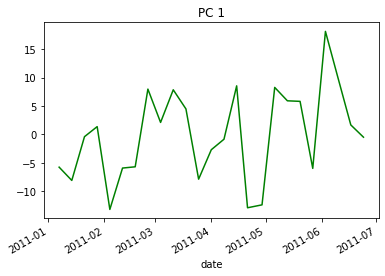

In [ ]:
PCA_factors['PC 1'].plot(color='green')
plt.title('PC 1')
plt.show()

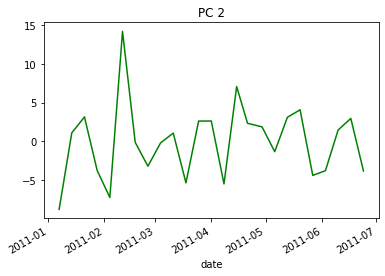

In [ ]:
PCA_factors['PC 2'].plot(color='green')
plt.title('PC 2')
plt.show()

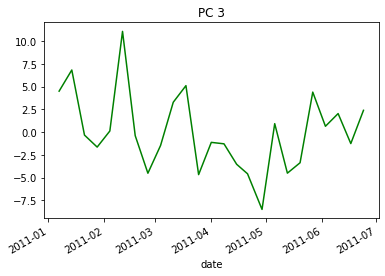

In [ ]:
PCA_factors['PC 3'].plot(color='green')
plt.title('PC 3')
plt.show()

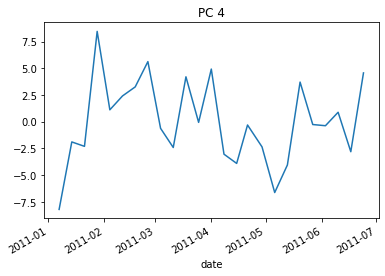

In [ ]:
PCA_factors['PC 4'].plot()
plt.title('PC 4')
plt.show()

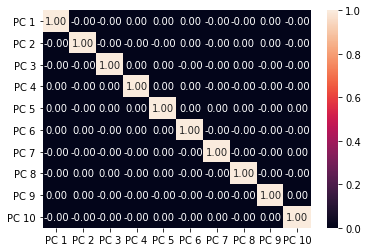

In [ ]:
sns.heatmap(PCA_factors.corr(),annot = True,fmt='.2f')

In [ ]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.33820378 0.12676937 0.09649864 0.08202011 0.06655823 0.05585797
 0.04599187 0.03589699 0.031824   0.02592418]


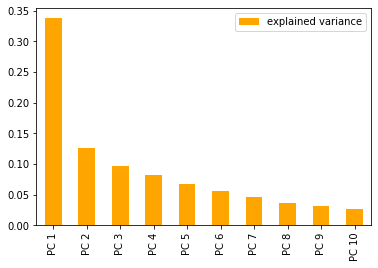

In [ ]:
labels=['PC 1','PC 2','PC 3', 'PC 4','PC 5','PC 6','PC 7','PC 8','PC 9','PC 10']
varratio=pd.DataFrame(pca.explained_variance_ratio_,index=labels,columns=['explained variance'])

varratio.plot.bar(color='orange')

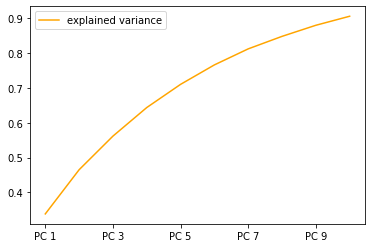

In [ ]:
cumsumvarratio=varratio.cumsum()

cumsumvarratio.plot(color='orange')

In [ ]:
cumsumvarratio

,explained variance
PC 1,0.338204
PC 2,0.464973
PC 3,0.561472
PC 4,0.643492
PC 5,0.710050
PC 6,0.765908
PC 7,0.811900
PC 8,0.847797
PC 9,0.879621
PC 10,0.905545


In [ ]:
pca.singular_values_

array([39.55381343, 24.21621666, 21.12806509, 19.4786703 , 17.54688398,
       16.07465604, 14.58611604, 12.88629752, 12.13323217, 10.95094636])

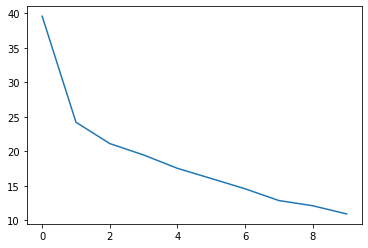

In [ ]:
plt.plot(pca.singular_values_)

In [ ]:
pca.components_.shape

(10, 30)

In [ ]:
pca.components_

array([[-2.90106177e-01, -1.72271240e-01, -2.48490402e-01,
        -1.86995054e-01, -3.20348745e-01, -1.75228866e-01,
        -2.06010404e-01, -2.56956510e-01, -2.62984336e-01,
        -1.66320932e-01, -1.30619932e-01, -2.80588327e-01,
        -1.22268915e-01, -2.41068714e-01, -1.37188708e-01,
        -1.86386528e-01, -3.34162973e-02, -6.25716797e-03,
        -3.81857340e-02, -1.85547872e-01, -2.84506991e-02,
        -1.57262913e-01, -1.24358953e-01, -2.20472045e-02,
        -8.71799784e-02, -1.63349430e-01, -1.95601884e-01,
        -8.03906997e-02, -7.91785026e-02, -2.54169364e-01],
       [-3.24379363e-01,  2.25390537e-01,  4.16081503e-02,
        -1.47507440e-01,  2.86611056e-02, -5.67150035e-01,
        -9.21271386e-02,  6.81101843e-03,  1.40217090e-01,
         1.61892224e-01,  2.24078254e-01, -1.37459247e-01,
         7.28543195e-02,  9.68168887e-02,  1.01720126e-01,
         4.74814321e-02,  2.04376006e-01,  1.01556084e-01,
         2.65978690e-01,  1.98569555e-01,  1.08692098e-

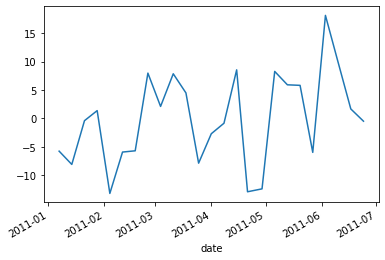

In [ ]:
PCA_factors['PC 1'].plot()

In [ ]:
X1.shape

(25, 30)

In [ ]:
import numpy as np
from numpy.linalg import eig
from numpy.linalg import svd

A=X1
M = np.mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
#C=A
#print(C)
# calculate covariance matrix of centered matrix
#V = np.cov(C.T)
V = np.cov(C)
#print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
#print(vectors)
#print(values)
# project data
P = vectors.T.dot(C)
#print(P.T)


u, s, vh =svd(X1)

print(u)
print(s)
print(vh)

stock
AA     -0.302084
AXP     0.521029
BA      0.253427
BAC    -0.976965
CAT     0.152660
CSCO   -1.178297
CVX     0.340060
DD      0.362452
DIS     0.175203
GE     -0.240471
HD      0.108416
HPQ    -0.472149
IBM     0.587680
INTC    0.188712
JNJ     0.270470
JPM    -0.070105
KO      0.081142
KRFT    0.544360
MCD     0.196842
MMM     0.207030
MRK    -0.020566
MSFT   -0.468074
PFE     0.591685
PG     -0.017015
T       0.059002
TRV     0.110706
UTX     0.306830
VZ     -0.124289
WMT     0.079834
XOM     0.240347
dtype: float64
[[-0.14762737 -0.30889227 -0.17059895 -0.32771265  0.30985533 -0.25988429
   0.12279814  0.17971376 -0.07900148  0.40460462 -0.20493759  0.01579562
  -0.04868219  0.18157437 -0.18121405  0.27872726 -0.12656744  0.06206929
  -0.18563405  0.02325582 -0.25383903  0.11333045  0.02030399  0.01225573
  -0.21116493]
 [-0.20769329  0.06035779 -0.32287321 -0.07863804 -0.67225569  0.14338289
  -0.07032894  0.28926998  0.12771635 -0.02873055 -0.12599093 -0.04111954
   0.10421

In [ ]:
vectors.shape

(25, 25)

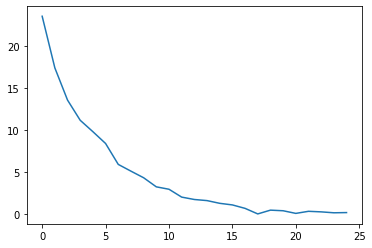

In [ ]:
plt.plot(values)

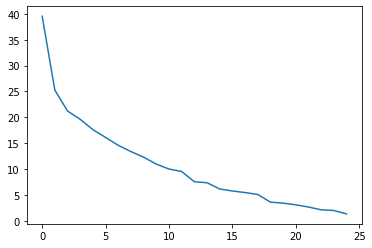

In [ ]:
plt.plot(s)

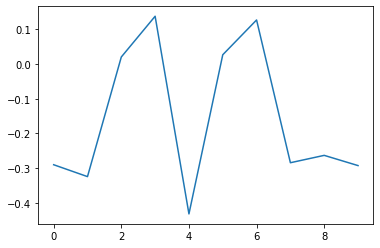

In [ ]:
plt.plot(pca.components_[:,0])

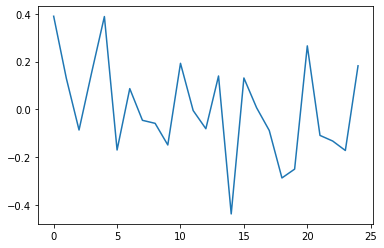

In [ ]:
plt.plot(vectors[:,0])

In [ ]:
pca_svd=u.dot(np.diag(s))

In [ ]:
pca_svd.shape

(25, 25)

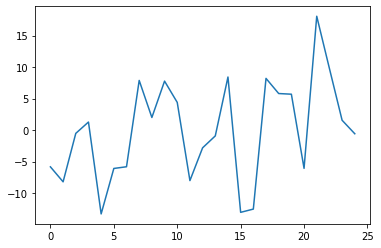

In [ ]:
plt.plot(pca_svd[:,0])

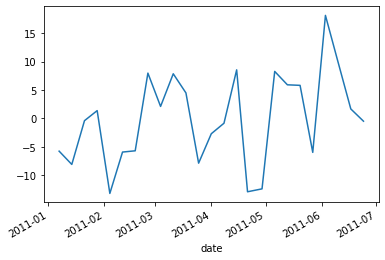

In [ ]:
PCA_factors['PC 1'].plot()

In [ ]:
pca.components_.shape

(10, 30)

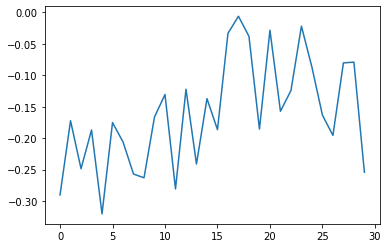

In [ ]:
plt.plot(pca.components_[0,:])

In [ ]:
#plt.plot(pca_svd[:,0])
np.corrcoef(pca_svd[:,0],PCA_factors['PC 1'])

array([[1.        , 0.99999629],
       [0.99999629, 1.        ]])

In [ ]:
np.corrcoef(pca_svd[:,1],PCA_factors['PC 2'])

array([[1.        , 0.99442697],
       [0.99442697, 1.        ]])

In [ ]:
np.corrcoef(pca_svd[:,0],X1.mean(axis=1))

array([[ 1.        , -0.97442072],
       [-0.97442072,  1.        ]])

In [ ]:
np.corrcoef(pca_svd[:,1],X1.mean(axis=1))

array([[1.        , 0.13050885],
       [0.13050885, 1.        ]])

In [ ]:
np.corrcoef(pca_svd[:,0],pca_svd[:,2])

array([[1.        , 0.00141968],
       [0.00141968, 1.        ]])

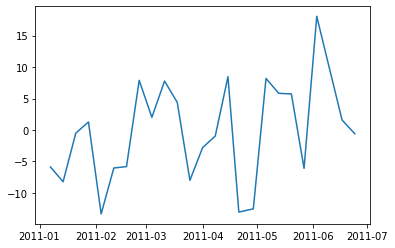

In [ ]:
plt.plot(X1.dot(np.diag(pca.components_[0,:])).sum(axis=1))

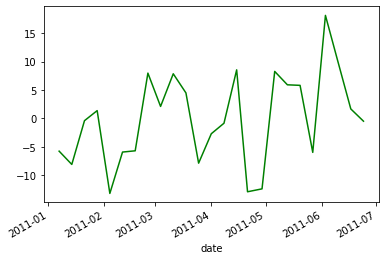

In [ ]:
PCA_factors['PC 1'].plot(color='green')

## KernelPCA

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import KernelPCA



target_names = X1.columns[:3]
pca = PCA(n_components=10)
X_r = pca.fit(X1).transform(X1)

kpca = KernelPCA(kernel='rbf',n_components=10)
X_r_pca = kpca.fit(X1).transform(X1)


Automatically created module for IPython interactive environment


In [ ]:
PCA_factors=pd.DataFrame(X_r[:,:10],columns=['PC 1','PC 2','PC 3', 'PC 4','PC 5','PC 6','PC 7','PC 8','PC 9','PC 10'],index=X1.index)
KPCA_factors=pd.DataFrame(X_r_pca[:,:10],columns=['KPC 1','KPC 2','KPC 3', 'KPC 4','KPC 5','KPC 6','KPC 7','KPC 8','KPC 9','KPC 10'],index=X1.index)

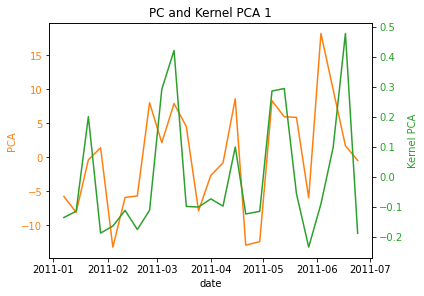

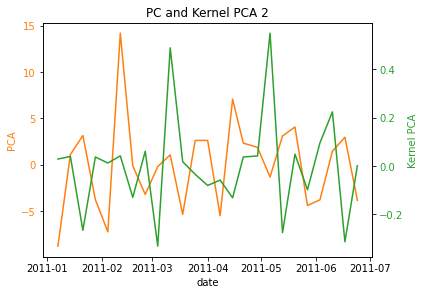

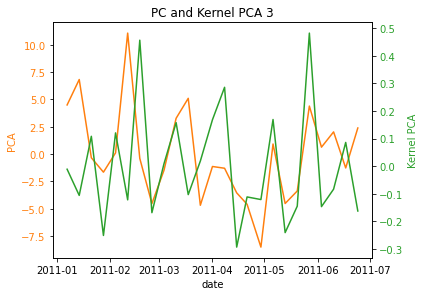

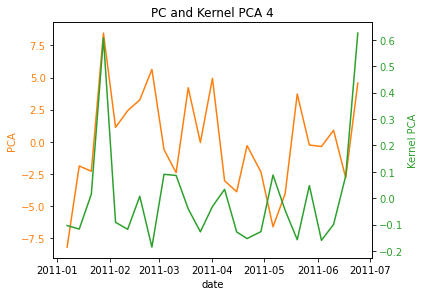

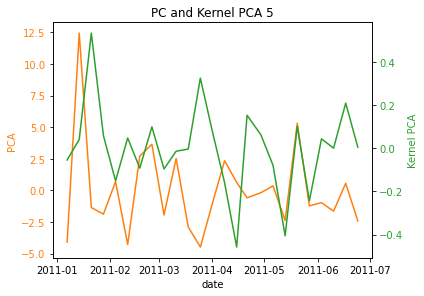

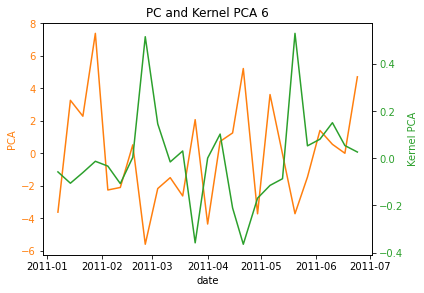

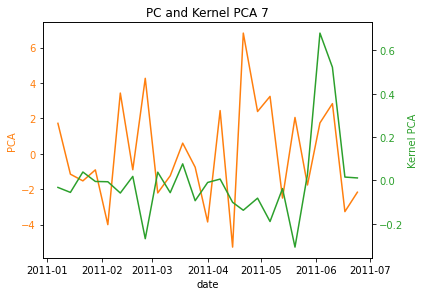

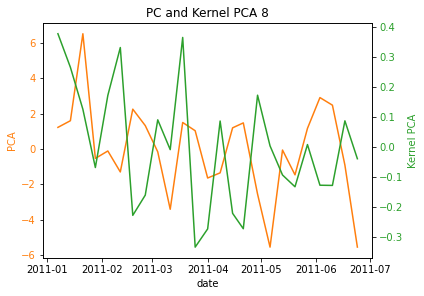

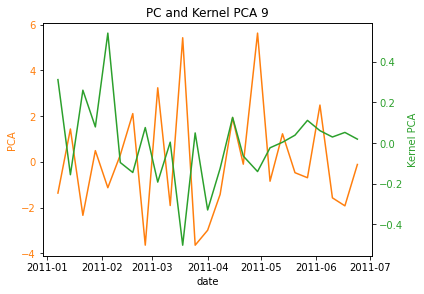

In [ ]:
for i in range(1,10):
  data1=PCA_factors['PC '+str(i)]
  data2=KPCA_factors['KPC '+str(i)]


  
  fig, ax1 = plt.subplots()

  color = 'tab:orange'
  ax1.set_xlabel('date')
  ax1.set_ylabel('PCA', color=color)
  ax1.plot(data1, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:green'
  ax2.set_ylabel('Kernel PCA', color=color)  # we already handled the x-label with ax1
  ax2.plot(data2, color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title('PC and Kernel PCA '+str(i))
  plt.show()




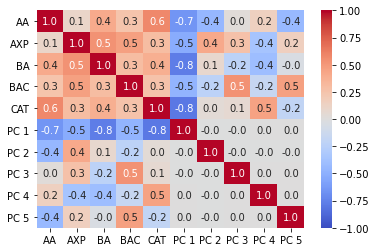

In [ ]:
sns.heatmap(pd.concat([X1.iloc[:,:5],PCA_factors.iloc[:,:5]],axis=1).corr(),annot = True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='coolwarm')

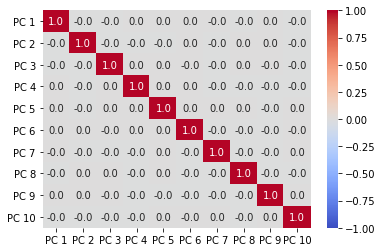

In [ ]:
sns.heatmap(PCA_factors.corr(),annot = True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='coolwarm')

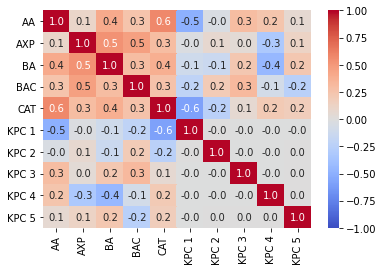

In [ ]:
sns.heatmap(pd.concat([X1.iloc[:,:5],KPCA_factors.iloc[:,:5]],axis=1).corr(),annot = True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='coolwarm')

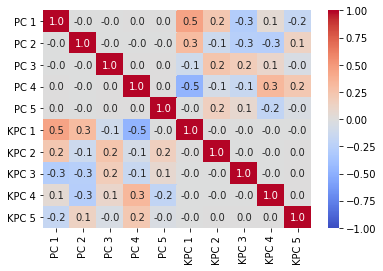

In [ ]:
sns.heatmap(pd.concat([PCA_factors.iloc[:,:5],KPCA_factors.iloc[:,:5]],axis=1).corr(),annot = True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='coolwarm')

## ICA

In [ ]:
X1.iloc[:,:5]

stock,AA,AXP,BA,BAC,CAT
date,,,,,
2011-01-07,3.792670,2.448040,4.882840,2.888090,-0.688705
2011-01-14,-4.428490,4.638010,0.936330,7.621740,0.858277
2011-01-21,-2.470660,-0.065175,1.157210,-5.503980,-1.497450
2011-01-28,1.638310,-4.755700,-3.201900,-4.561400,3.203540
2011-02-04,5.933250,-0.702470,3.060930,4.230490,3.599290
2011-02-11,0.230814,6.346680,0.993980,1.791870,3.934950
2011-02-18,-0.632547,-1.917280,0.467675,-0.135410,2.220930
2011-02-25,-1.766780,-3.137520,-0.069109,-1.251740,-2.727450
2011-03-04,-1.368230,-0.022868,-0.924520,-1.051160,0.311526


In [ ]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#target_names = X1.columns[:3]
model = FastICA(n_components=5)
X_r = model.fit(X1).transform(X1)

model = PCA(n_components=5)
X_r_pca = model.fit(X1).transform(X1)


Automatically created module for IPython interactive environment


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [ ]:
X1.iloc[:,:5].head()

stock,AA,AXP,BA,BAC,CAT
date,,,,,
2011-01-07,3.79267,2.448040,4.88284,2.88809,-0.688705
2011-01-14,-4.42849,4.638010,0.93633,7.62174,0.858277
2011-01-21,-2.47066,-0.065175,1.15721,-5.50398,-1.497450
2011-01-28,1.63831,-4.755700,-3.20190,-4.56140,3.203540
2011-02-04,5.93325,-0.702470,3.06093,4.23049,3.599290


In [ ]:
ICA_factors=pd.DataFrame(X_r[:,:5],columns=['IPC 1','IPC 2','IPC 3','IPC 4','IPC 5'],index=X1.index)
PCA_factors=pd.DataFrame(X_r_pca[:,:5],columns=['PC 1','PC 2','PC 3','PC 4','PC 5'],index=X1.index)

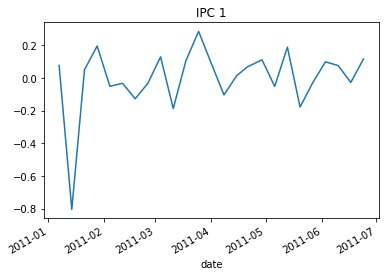

In [ ]:
ICA_factors['IPC 1'].plot()
plt.title('IPC 1')
plt.show()

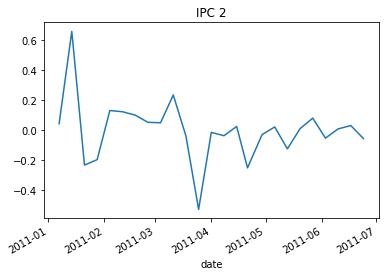

In [ ]:
ICA_factors['IPC 2'].plot()
plt.title('IPC 2')
plt.show()

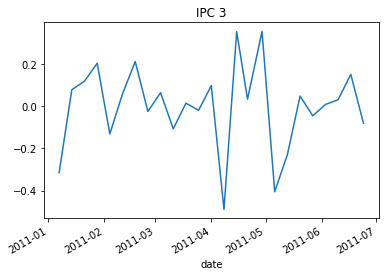

In [ ]:
ICA_factors['IPC 3'].plot()
plt.title('IPC 3')
plt.show()

In [ ]:
X1c=X1.iloc[:,:5]
pd.concat([X1c,ICA_factors,PCA_factors],axis=1).corr()


,AA,AXP,BA,BAC,CAT,IPC 1,IPC 2,IPC 3,IPC 4,IPC 5,PC 1,PC 2,PC 3,PC 4,PC 5
AA,1.000000,0.108545,0.410571,0.250739,0.579356,3.491057e-01,-5.997232e-01,-1.555523e-02,-4.283049e-01,4.123621e-01,-6.526627e-01,-4.467895e-01,2.445469e-02,1.526625e-01,-4.310209e-01
AXP,0.108545,1.000000,0.533712,0.464331,0.303272,-3.847676e-01,3.454476e-02,-4.950497e-01,-5.149014e-01,-8.823764e-02,-5.192481e-01,4.159257e-01,2.688082e-01,-3.566220e-01,1.586600e-01
BA,0.410571,0.533712,1.000000,0.301004,0.385238,-2.248861e-02,-2.971710e-02,-9.206027e-02,-8.921118e-01,5.451508e-02,-7.677427e-01,7.870502e-02,-2.250836e-01,-4.011148e-01,-3.899140e-02
BAC,0.250739,0.464331,0.301004,1.000000,0.260299,-6.888783e-01,-4.893749e-01,-1.082417e-01,-2.497911e-01,8.591078e-02,-4.690897e-01,-2.265466e-01,5.343721e-01,-1.583367e-01,4.621050e-01
CAT,0.579356,0.303272,0.385238,0.260299,1.000000,1.034948e-01,-2.301429e-01,-3.416876e-01,-3.872956e-01,7.410763e-01,-7.934535e-01,4.346196e-02,6.677765e-02,4.562939e-01,-1.884109e-01
IPC 1,0.349106,-0.384768,-0.022489,-0.688878,0.103495,1.000000e+00,-2.257809e-12,-1.437726e-13,-2.147033e-12,-3.628486e-13,1.186092e-01,-6.716891e-02,-3.996396e-01,1.273636e-01,-8.974892e-01
IPC 2,-0.599723,0.034545,-0.029717,-0.489375,-0.230143,-2.257809e-12,1.000000e+00,1.140817e-12,1.740340e-11,2.875401e-12,2.484729e-01,7.227726e-01,-5.926433e-01,4.862463e-02,2.495407e-01
IPC 3,-0.015555,-0.495050,-0.092060,-0.108242,-0.341688,-1.437726e-13,1.140817e-12,1.000000e+00,1.088061e-12,1.798882e-13,2.333925e-01,-6.849669e-01,-5.978431e-01,-4.931097e-02,3.413214e-01
IPC 4,-0.428305,-0.514901,-0.892112,-0.249791,-0.387296,-2.147033e-12,1.740340e-11,1.088061e-12,1.000000e+00,2.735680e-12,7.954956e-01,-4.271181e-02,3.353492e-01,5.019851e-01,3.023748e-02
IPC 5,0.412362,-0.088238,0.054515,0.085911,0.741076,-3.628486e-13,2.875401e-12,1.798882e-13,2.735680e-12,1.000000e+00,-4.867317e-01,-4.565280e-02,-1.385157e-01,8.526392e-01,1.217699e-01


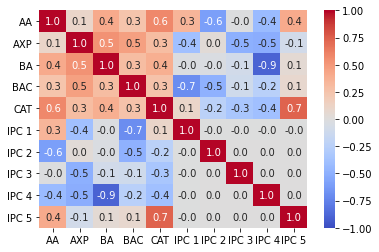

In [ ]:
sns.heatmap(pd.concat([X1c,ICA_factors.iloc[:,:5]],axis=1).corr(),annot = True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='coolwarm')

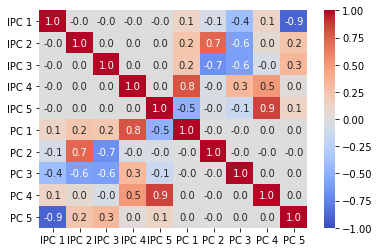

In [ ]:
sns.heatmap(pd.concat([ICA_factors.iloc[:,:5],PCA_factors.iloc[:,:5]],axis=1).corr(),annot = True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='coolwarm')

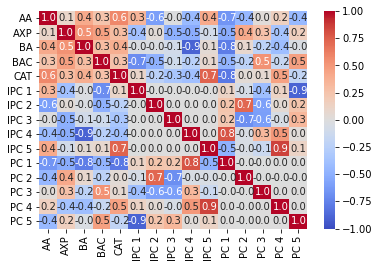

In [ ]:
sns.heatmap(pd.concat([X1c,ICA_factors.iloc[:,:5],PCA_factors.iloc[:,:5]],axis=1).corr(),annot = True,fmt='.1f',vmin=-1, vmax=1, center= 0,cmap='coolwarm')

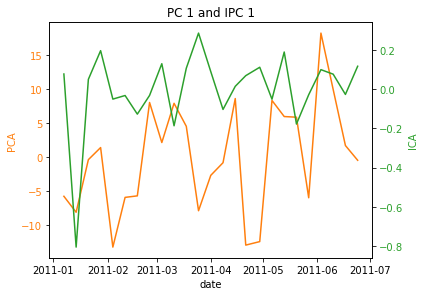

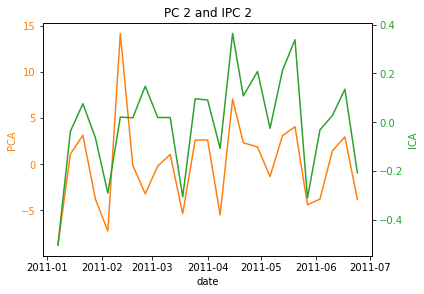

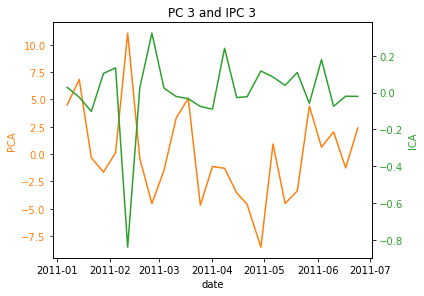

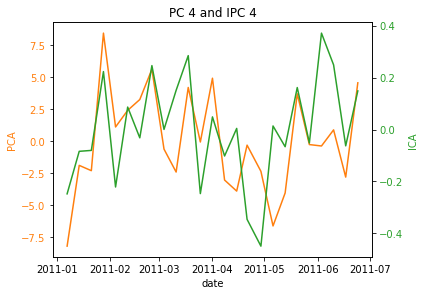

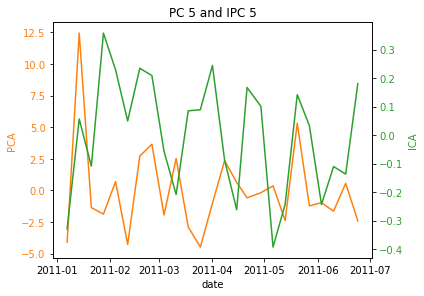

In [ ]:
for i in range(1,6):
  data1=PCA_factors['PC '+str(i)]
  data2=ICA_factors['IPC '+str(i)]

  fig, ax1 = plt.subplots()

  color = 'tab:orange'
  ax1.set_xlabel('date')
  ax1.set_ylabel('PCA', color=color)
  ax1.plot(data1, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:green'
  ax2.set_ylabel('ICA', color=color)  # we already handled the x-label with ax1
  ax2.plot(data2, color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title('PC '+str(i)+' and IPC '+str(i))
  plt.show()


## K-means


In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)

data_y = [round(y/10) for y in data_y]

# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

Automatically created module for IPython interactive environment


In [ ]:
from sklearn.cluster import KMeans

X=X_train
model = KMeans(n_clusters=4, random_state=0).fit(X)
print(model.labels_)
print(model.cluster_centers_)


from sklearn import metrics
labels_true = y_train
labels_pred = model.labels_
_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))

print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))


print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))

print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)



[0 0 0 2 2 1 1 2 3 0 1 3 2 2 1 0 0 0 1 3 0 2 2 0 0 1 0 1 3 1 1 0 1 2 0 0 0
 0 0 0 0 2 2 3 2 2 1 2 2 1 1 2 0 2 2 0 1 1 0 0 3 0 2 2 0 0 1 0 0 0 2 0 0 0
 0 0 3 1 1 1 3 2 1 0 0 2 3 1 2 1 0 2 0 2 1 1 1 3 2 1 1 3 1 2 0 0 3 1 1 2 1
 0 1 2 3 2 1 3 3 0 1 3 1 2 2 2 0 1 1 2 0 0 3 0 3 1 0 0 2 0 2 0 2 0 1 2 0 1
 0 2 1 1 1 3 3 3 0 2 3 1 3 0 0 0 1 1 0 1 0 0 2 2 3 0 2 0 1 0 0 3 2 1 0 0 0
 0 2 0 1 1 0 3 1 2 1 0 0 2 1 0 2 0 3 2 0 0 0 0 0 2 0 3 1 0 3 0 0 2 2 0 0 2
 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 1 2 2 2 1 0 0 2 1 3 1 0 2 0 3 2 2 0 3 0 1 0
 2 3 0 2 0 2 1 0 0 1 3 2 2 1 0 0 1 1 0 0 2 1 2 0 0 0 3 0 1 1 2 2 2 2 0 0 0
 1 2 3 3 2 0 0 2 2 0 1 2 2 0 2 0 2 0 2 2 1 3 0 0 2 0 1 0 3 1 1 1 0 2 2 3 2
 2 2 1 3 1 0 0 0 2 2 0 3 3 2 1 2 0 0 0 1 1 0 1 0 1 3 3 0 2 0 2 0 0 3 0 0 1
 0 2 3 3 0 3 1 0 1]
[[-0.39191291 -0.11072616 -0.67115661 -0.00631502 -0.52648105  0.42263376
  -0.39238817  0.28930414 -0.57349079 -0.77600338 -0.28185047  0.36739441
  -0.6371688 ]
 [-0.32341839 -0.48772236  0.64422206  0.14468341  0.43475394 -0.65

array([[ 0,  0,  2,  0],
       [ 0, 21, 51,  0],
       [85, 63, 39, 21],
       [37,  1,  2, 19],
       [16,  0,  0,  6],
       [10,  0,  3,  3]])

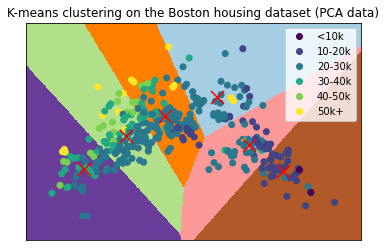

Homogeneity: 0.232
Completeness: 0.169
V-measure: 0.195
Adjusted Rand Score: 0.077
Adjusted Mutual Info Score: 0.176
Fowlkes Mallows Score: 0.322
Silhouette Coefficient: 0.401
Calinski-Harabasz Index: 625.255
Davies-Bouldin Score: 0.837
Contingency Matrix:


array([[ 0,  0,  0,  0,  0,  2],
       [ 7,  0, 23, 10,  0, 32],
       [34, 53, 35, 61, 22,  3],
       [ 1, 22,  2, 16, 18,  0],
       [ 0,  9,  0,  7,  6,  0],
       [ 3,  5,  1,  4,  3,  0]])

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X_train)

X=reduced_data

model = KMeans(init="k-means++", n_clusters=6, n_init=4)
model.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

categories = np.unique(y_train)
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

vcolor = pd.Series(y_train).apply(lambda x: colordict[x])

scatter=plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=vcolor)
classes=['<10k','10-20k','20-30k','30-40k','40-50k','50k+']

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

#plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2,c='blue')
# Plot the centroids as a white X
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="r", zorder=10)
plt.title("K-means clustering on the Boston housing dataset (PCA data)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

from sklearn import metrics
labels_true = y_train
labels_pred = model.labels_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))

print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))


print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))

print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)


## t-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 379 samples in 0.001s...
[t-SNE] Computed neighbors for 379 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 379 / 379
[t-SNE] Mean sigma: 1.194144
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.433437
[t-SNE] KL divergence after 300 iterations: 0.369662


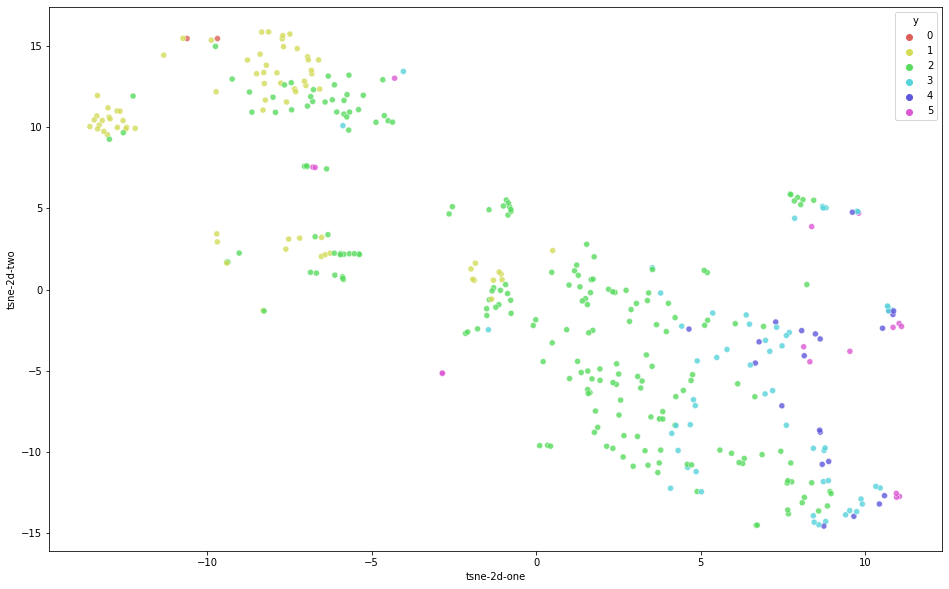

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

reduced_data = PCA(n_components=10).fit_transform(X_train)

X=reduced_data

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

df_subset=pd.DataFrame(data=y_train,columns=['y'])

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.8
)

## Latent Dirichlet Allocation

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.

lda = LatentDirichletAllocation(n_components=5,random_state=0)
lda.fit(X)

lda.transform(X[-2:])

ValueError: ignored

##Affinity Propagation


In [ ]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation().fit(X_train)

print(clustering.labels_)


print(clustering.cluster_centers_)




[16 16  0 17  7 10 19  7  3 11  9 16  7 17 13  4  5 11 12  3  4  7  2  4
  4 10 11 10  3  1 12 16 12  7 12  5  4 16 11 11 16 20 17  3  2 20  9 20
 17 13 13 20 16 17  7 11 19 12 11 16  3  4  7  7  6  4 13  6 11  5 20 11
  0 11 11  6 18 14 19 14 16 20 19  4  9  7  3 13  7 10 13 17  4  2  9 12
 14  3  8 12 13  5 13  7 13 11 16 13 19 17  1  6 13  8  3 20 10  5  3  4
  1 18 12  7 17  7  4 10 12 20 11 16  3 11  5  9 11 11  2 12  2 16  7 19
 12 17 11 14 11  2 10  9 13  3 16  3 11 17  5 11 18  0  6 16 12  9  4 10
 13 19  2  2 18  0 17 11 13 11 11  5 15 13  4 19 16 13 20 13 14  9 11  5
 12  2 10  4  6 20 13 13 15 16  5 17 12 11 11  9  4  7  4  3  1  4  3 11
 13 15 20  5 11 17  4 17 16  4  6  5 17 11  6 11 20 16 11 11  5  9 17 17
 17  1  9 16 17 10  5 12 11 17  4  3 20  7  4 16  4 13  4  8 18 11 20  4
 20 19 16  4 12  5  2 17 12  5  4 14 14 16  4  8 10  7 13  6 11 18 11  1
 10  2  7 17  2  4 16  6 13  8 18  3  7 11  6 17 17 11 12  2 20  0  7 11
  2  5 17 17 10 18 12  4  8  0 14 16 18 12 12 10 11

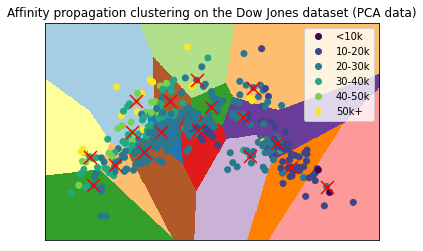

Homogeneity: 0.444
Completeness: 0.205
V-measure: 0.281
Adjusted Rand Score: 0.076
Adjusted Mutual Info Score: 0.241
Fowlkes Mallows Score: 0.251
Silhouette Coefficient: 0.380
Calinski-Harabasz Index: 619.155
Davies-Bouldin Score: 0.808
Contingency Matrix:


array([[ 0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  8, 10,  0,  4, 24,  0,  4, 22,  0,  0,
         0],
       [ 3,  1, 33,  5,  8, 16,  1, 31, 14, 11,  2, 14, 12, 18,  1, 12,
        26],
       [11,  5,  6,  2,  4,  0,  0,  1,  7,  0,  0,  1,  0,  1,  6, 13,
         2],
       [ 5,  5,  0,  0,  1,  0,  0,  0,  3,  0,  0,  0,  0,  0,  2,  6,
         0],
       [ 1,  6,  0,  3,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  3,  0,
         0]])

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X_train)
model = AffinityPropagation()
X=reduced_data
model.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

categories = np.unique(y_train)
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

vcolor = pd.Series(y_train).apply(lambda x: colordict[x])

scatter=plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=vcolor)
classes=['<10k','10-20k','20-30k','30-40k','40-50k','50k+']

plt.legend(handles=scatter.legend_elements()[0], labels=classes)


# Plot the centroids as a white X
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="r", zorder=10)
plt.title("Affinity propagation clustering on the Dow Jones dataset (PCA data)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


from sklearn import metrics
labels_true = y_train
labels_pred = model.labels_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))

print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))


print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))

print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)
 


##Mean Shift


In [ ]:
from sklearn.cluster import MeanShift
import numpy as np

clustering = MeanShift(bandwidth=2).fit(X_train)

print(clustering.labels_)

print(clustering.cluster_centers_)

[ 0  0 10  1  3  4  8  3  2  0 22  0  3  1  0  0  0  0  0  2  0  3  1  0
  0 23  0  4  2  4  0  0  4  3  0  0  0  0  0  0  0  1  1  2  1  1 25  1
  1  4  4  1  0  1 17  0  8  4  0  0  2  0  3  3  5  0  0  5  0  2  1  0
 10  0  0  5  2  7  8  7  0  1  8  0  6  3  2  0  3  4  0  1  0 18  6  0
  7  2  9  4  8  2  0  3  0  0  2  0  8  1  4  5  8 21  2  1  4  2  2  0
  4  2  4 19  1  3 12  4  4  1  0  0  2  0  2  6  0  0  1  0 20  0  3  8
  0  1  0  7  0  1  4  6  0 13  2 13  0  1  2 28  2  6  5  0  0  6  0  4
  0 12  1  1  2 10  1  0  0  0  0  2 16  0  0 12  0  0  1  0  7 26  0  2
  4 18  4  0  5  1  0  0 15  0  2  1  0  0  0  6 12  3  0  2  4  5  2  0
  0 14  1  2  0  1  0  1  0  0  5  0  1  0  5  0  1  0  0  0  0  6  1  1
  1  4  6  0  1  4  2  4  0  1  0  2 20  3  0  2  0  0  0  9  2  0  1  0
  1  8  0  0 28  2 23  1  0  0  0  7  7  0  5  9  4  3  0  5  0  2  0  4
  4  1  3  1 18  0  0  5  0  9  2  2  3  0  5  1  1  0  4  1  1 10  3  0
  1  0  1  1  4  2  0  0  9 24  7  0  2  0 28  4  0

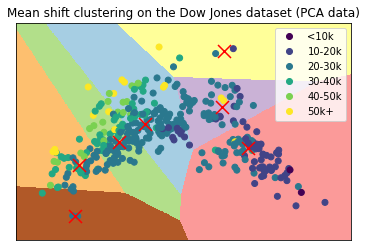

Homogeneity: 0.202
Completeness: 0.156
V-measure: 0.176
Adjusted Rand Score: 0.076
Adjusted Mutual Info Score: 0.153
Fowlkes Mallows Score: 0.337
Silhouette Coefficient: 0.389
Calinski-Harabasz Index: 456.712
Davies-Bouldin Score: 0.851
Contingency Matrix:


array([[ 0,  0,  2,  0,  0,  0,  0],
       [10,  0, 53,  0,  8,  1,  0],
       [69, 46, 35, 19, 34,  2,  3],
       [18, 20,  2, 17,  0,  1,  1],
       [11,  5,  0,  6,  0,  0,  0],
       [ 5,  4,  1,  3,  2,  1,  0]])

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X_train)
model = MeanShift(bandwidth=1)
X=reduced_data
model.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

categories = np.unique(y_train)
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

vcolor = pd.Series(y_train).apply(lambda x: colordict[x])

scatter=plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=vcolor)
classes=['<10k','10-20k','20-30k','30-40k','40-50k','50k+']

plt.legend(handles=scatter.legend_elements()[0], labels=classes)
# Plot the centroids as a white X
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="r", zorder=10)
plt.title("Mean shift clustering on the Dow Jones dataset (PCA data)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

from sklearn import metrics
labels_true = y_train
labels_pred = model.labels_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))


print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))

print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)


##Spectral clustering


In [ ]:
from sklearn.cluster import SpectralClustering

reduced_data = PCA(n_components=2).fit_transform(X_train)

X=reduced_data

clustering = SpectralClustering(n_clusters=6, assign_labels="discretize", 
                                random_state=0).fit(X)
print(clustering.labels_)


from sklearn import metrics
labels_true = y_train
labels_pred = clustering.labels_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))


print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))


print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)


[2 2 2 4 1 0 0 1 3 5 0 3 1 4 5 2 2 2 5 3 2 1 1 5 2 4 2 0 3 0 5 2 5 1 5 2 5
 3 2 2 2 4 4 3 1 4 5 4 4 5 5 4 2 4 1 2 5 5 2 2 3 2 4 1 5 2 5 2 2 2 4 5 2 2
 5 5 3 0 5 0 3 4 5 2 5 1 3 5 1 0 5 4 2 1 5 5 0 3 0 5 5 2 5 1 5 2 3 5 5 4 5
 5 5 0 3 4 0 3 3 5 0 3 5 1 4 1 2 0 5 4 2 2 3 2 3 5 2 5 1 5 4 2 1 5 5 4 2 0
 2 4 0 5 5 3 3 3 2 4 2 5 3 5 5 2 5 5 5 0 5 5 4 4 3 2 4 2 5 5 5 3 1 5 2 5 2
 5 4 5 0 0 2 2 5 1 0 2 5 4 5 5 1 2 2 4 5 2 2 5 5 1 2 3 0 2 3 5 5 1 4 2 2 4
 5 4 2 2 5 5 4 2 5 5 4 2 2 2 2 5 4 4 4 0 5 2 4 0 2 5 2 4 2 3 4 4 2 3 2 5 5
 0 3 5 4 2 4 5 2 2 5 3 1 4 5 2 5 0 0 2 5 0 0 1 5 5 2 3 2 5 4 1 1 4 1 5 2 5
 5 0 3 3 1 2 5 4 4 2 5 1 4 2 1 2 4 2 4 4 0 3 5 5 0 5 0 2 3 5 5 0 5 4 4 3 1
 1 4 0 3 4 5 2 2 4 1 2 3 3 4 5 1 5 2 2 5 5 2 4 5 0 3 3 5 4 5 4 2 2 3 2 2 5
 5 4 3 3 5 3 5 5 5]
Homogeneity: 0.231
Completeness: 0.173
V-measure: 0.198
Adjusted Rand Score: 0.086
Adjusted Mutual Info Score: 0.179
Fowlkes Mallows Score: 0.337
Silhouette Coefficient: 0.403
Calinski-Harabasz Index: 613.785
Davies-Bouldin Score:

array([[ 0,  2,  0,  0,  0,  0],
       [ 8, 29,  0,  0, 25, 10],
       [25,  3, 57, 18, 33, 72],
       [ 0,  0, 22, 18,  2, 17],
       [ 0,  0,  9,  6,  0,  7],
       [ 2,  0,  4,  3,  1,  6]])

##Hierarchical clustering


[225 375 276 342 376 247 307 328 239 367 347 359 256 368 263 213 267 349
 301 351 212 277 316 346 352 343 305 289 229 292 319 217 243 303 218 206
 353 108 205 331 192 238 337 216 341 187 248 371 278 220 236 253 207 242
 244 287 345 311 291 189 355 317 339 365 366 286 257 275 333 344 245 252
 227 325 121 226 361 377 348 332 268 357 309 228 259 200 296 284 113 370
 310 175 258 199 293 254 285 302 271 334 266 280 224 356 177 272 112 358
 330 378 209 274 297 138 279 369 133 327 235 241 208 195 273 172 300 223
 204 308 142 354 372 237 313 265 262 264 362 117 306 350 201 198 320 251
 281 136 173 150 363 174 298 219 135 210 159 299 193 176 269 194 290 304
 338 240 148 221 126 324 326 318 191 125 132 232 151 190 231 153 314 145
 312 246 178 250 119 294 183 154 118 215 295 185 283 137 222 180 288 374
 255 203 188 184 147  93  87 168 329 149 156 166 249 373 230 214 364 282
  95 152 260 124 146 315  62 111 110  76 202 131 321 164 141 234 157 144
 140 261 270  70  99 155 181  58 123  75 335 322 17

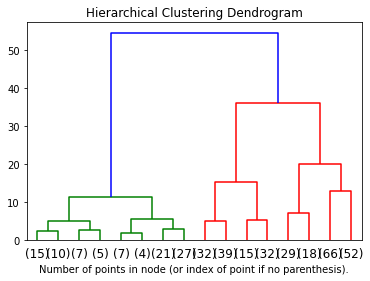

Homogeneity: 1.000
Completeness: 0.212
V-measure: 0.350
Adjusted Rand Score: 0.000
Adjusted Mutual Info Score: 0.000
Fowlkes Mallows Score: 0.000
Contingency Matrix:


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram



def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


reduced_data = PCA(n_components=2).fit_transform(X_train)

X=reduced_data

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

print(clustering.labels_)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering , truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


from sklearn import metrics
labels_true = y_train
labels_pred = clustering.labels_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))
#print("Silhouette Coefficient: %0.3f"
 #     % metrics.silhouette_score(X, labels_pred))


#print("Calinski-Harabasz Index: %0.3f"
 #     % metrics.calinski_harabasz_score(X, labels_pred))

#print("Davies-Bouldin Score: %0.3f"
 #     % metrics.davies_bouldin_score(X, labels_pred))

print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)

##DBSCAN


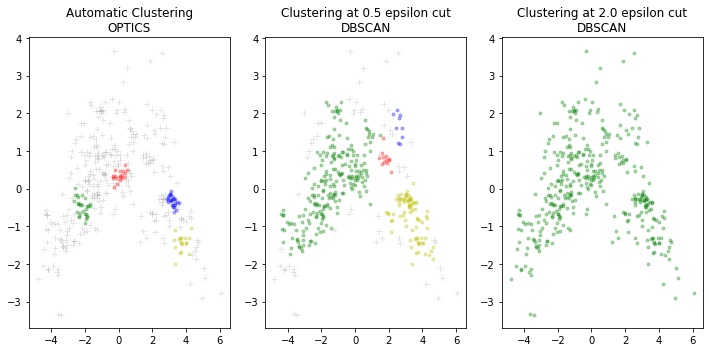

In [ ]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause


from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 5

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X0 = np.vstack((C1, C2, C3, C4, C5, C6))

reduced_data = PCA(n_components=2).fit_transform(X_train)

X=reduced_data



clust = OPTICS(min_samples=10, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)#eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 5))
G = gridspec.GridSpec(1, 3)
#ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[0, 0])
ax3 = plt.subplot(G[0, 1])
ax4 = plt.subplot(G[0, 2])

nklass=5

# Reachability plot
#colors = ['g.', 'r.', 'b.', 'y.', 'c.']
#for klass, color in zip(range(0, nklass), colors):
#    Xk = space[labels == klass]
#    Rk = reachability[labels == klass]
#    ax1.plot(Xk, Rk, color, alpha=0.3)
#ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
#ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
#ax1.set_ylabel('Reachability (epsilon distance)')
#ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, nklass), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g.', 'r.', 'b.', 'y.', 'c.']#['g.', 'greenyellow.', 'olive.', 'r.', 'b.', 'c.']
for klass, color in zip(range(0, nklass+1), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'r.', 'b.', 'y.', 'c.']#['g.', 'greenyellow.', 'olive.', 'r.', 'b.', 'c.']#['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, nklass+1), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

In [ ]:
X0.shape

(30, 2)

In [ ]:
X_train.shape

(379, 13)

In [ ]:
X1

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,HD,HPQ,IBM,INTC,JNJ,JPM,KO,KRFT,MCD,MMM,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-07,3.792670,2.448040,4.882840,2.888090,-0.688705,2.542790,-0.512765,-0.579421,4.531000,-0.324500,-2.329550,6.797730,0.489097,-1.665870,-0.047900,1.488370,-4.493020,-1.794710,-3.540860,-0.599424,2.920910,1.960780,3.615820,0.170834,-2.796500,-4.920660,-0.138906,-0.360510,-0.276600,2.536630
2011-01-14,-4.428490,4.638010,0.936330,7.621740,0.858277,1.289400,2.067070,3.105590,0.717765,1.128430,5.064400,3.098530,2.040820,1.786580,0.417402,3.790150,0.685805,1.391140,-0.255892,2.800470,-8.132040,0.354610,0.658617,1.754660,-0.385424,2.842620,1.034880,-2.982220,2.162160,3.607080
2011-01-21,-2.470660,-0.065175,1.157210,-5.503980,-1.497450,-2.356270,0.903809,-2.382390,1.714870,4.004210,1.501250,2.362380,3.791220,-0.998573,0.723356,0.599733,-0.696092,-0.191022,0.482251,1.650730,-0.498973,-0.497159,0.054496,0.396040,-0.770578,0.695716,1.160440,-1.215380,1.125020,1.529760
2011-01-28,1.638310,-4.755700,-3.201900,-4.561400,3.203540,0.431862,-0.553840,3.819160,-1.992940,1.354740,0.658256,-2.527310,2.438550,2.044700,-4.076090,-1.481970,-1.049790,-2.739730,-1.306400,-1.984080,-2.706680,-0.963597,-0.981997,-2.579670,-3.408290,1.215090,1.457760,2.150230,2.365050,0.177552
2011-02-04,5.933250,-0.702470,3.060930,4.230490,3.599290,5.351170,3.473630,4.745760,4.277660,2.136120,-0.888769,4.448360,3.028020,0.603248,1.130320,0.405314,0.385109,2.161810,0.338753,0.409417,-1.201560,0.000000,6.102250,-1.149960,2.005840,2.866870,0.880196,1.879910,-0.744021,4.204200
2011-02-11,0.230814,6.346680,0.993980,1.791870,3.934950,-15.422900,-0.853207,3.724820,6.397060,2.696200,1.847830,1.949280,-0.140176,0.091996,-0.295664,4.067040,1.436090,-1.667740,2.711450,4.117050,0.394657,-1.978420,-2.283340,1.219700,1.787630,2.913470,2.836450,0.247934,-0.677724,-0.754943
2011-02-18,-0.632547,-1.917280,0.467675,-0.135410,2.220930,0.053079,3.371730,2.828800,0.856680,-0.325430,2.695490,0.454076,0.401998,2.357840,0.692042,4.347830,1.382130,0.782524,0.078875,1.351940,-0.363967,-0.514706,1.965990,-0.771605,0.598592,3.535010,-0.070530,0.853759,0.217155,3.048780
2011-02-25,-1.766780,-3.137520,-0.069109,-1.251740,-2.727450,-0.480513,2.892270,-1.601460,0.280177,-0.287356,-5.648850,-10.279600,-0.788653,-0.410023,-1.713910,-1.101690,1.499370,3.222660,-1.988150,-2.674430,-1.709920,-0.858850,-0.105932,-1.396520,-0.670904,-1.650160,-1.383960,-0.745033,-3.828280,0.435448
2011-03-04,-1.368230,-0.022868,-0.924520,-1.051160,0.311526,-1.181530,1.437230,-0.645518,1.231990,-2.768500,0.188425,-1.045050,-0.326435,-0.873563,1.885530,-2.755820,1.620690,-0.754243,2.039990,0.315560,2.670810,-2.772570,3.746700,-1.226110,-1.168140,-0.704698,-0.861450,0.055463,0.618357,-0.919995


In [ ]:
from sklearn.cluster import DBSCAN


clustering = DBSCAN(eps=3, min_samples=2).fit(X_train)
clustering.labels_



NameError: ignored

Estimated number of clusters: 50
Estimated number of noise points: 0
Homogeneity: 0.389
Completeness: 0.226
V-measure: 0.286
Adjusted Rand Index: 0.138
Adjusted Mutual Information: 0.187
Silhouette Coefficient: -0.167


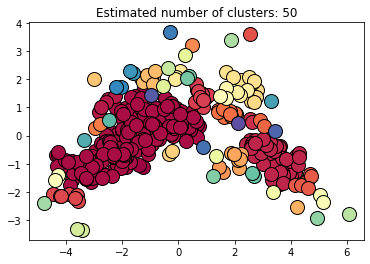

Homogeneity: 0.389
Completeness: 0.226
V-measure: 0.286
Adjusted Rand Score: 0.138
Adjusted Mutual Info Score: 0.187
Fowlkes Mallows Score: 0.415
Silhouette Coefficient: -0.167
Calinski-Harabasz Index: 36.542
Davies-Bouldin Score: 0.593
Contingency Matrix:


array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   9,   0,  42,   1,   0,   0,   1,   5,   2,   3,   0,   0,
          0,   0,   1,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0],
       [  2, 122,   0,  21,   1,  11,   4,   0,   1,   0,   8,   0,   0,
          2,   6,   0,   0,   0,   2,   2,   5,   1,   1,   1,   2,   0,
          1,   0,   1,   1,   1,   2,   1,   0,   1,   0,   0,   1,   2,
          2,   0,   0,   1,   0,   0,   0,   0,   0,   1,   1],
       [  0,  40,   3,   1,   0,   0,   2,   0,   0,   0,   0,   0,   1,
          0,   1,   0,   7,   0,   0,   0,   0,   0,   0,   0,   0,   2,
     

In [ ]:
labels_true=y_train

reduced_data = PCA(n_components=2).fit_transform(X_train)

X=reduced_data

db = DBSCAN(eps=0.3, min_samples=1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

from sklearn import metrics
labels_true = y_train
labels_pred = db.labels_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))

print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))

print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)


In [ ]:
metrics.silhouette_score(X, labels)

-0.16689863322752585

##OPTICS


In [ ]:
from sklearn.cluster import OPTICS

labels_true=y_train

reduced_data = PCA(n_components=2).fit_transform(X_train)

X=reduced_data

clustering = OPTICS(min_samples=2).fit(X)
clustering.labels_

from sklearn import metrics
labels_true = y_train
labels_pred = clustering.labels_

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))


print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))

print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)


Homogeneity: 0.637
Completeness: 0.188
V-measure: 0.290
Adjusted Rand Score: 0.015
Adjusted Mutual Info Score: 0.121
Fowlkes Mallows Score: 0.143
Silhouette Coefficient: 0.249
Calinski-Harabasz Index: 9.514
Davies-Bouldin Score: 1.891
Contingency Matrix:


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
         0,  0],
       [14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,
         1,  0,  2,  1,  2,  2,  1,  2,  2,  6,  2,  2,  0,  0,  0,  1,
         5,  3,  1,  3,  3,  2,  4,  2,  1,  0,

##Birch

In [ ]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=None)


labels_true=y_train

reduced_data = PCA(n_components=2).fit_transform(X_train)

X=reduced_data

brc.fit(X)

labels_pred=brc.predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))

print("Adjusted Rand Score: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))

print("Adjusted Mutual Info Score: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))

print("Fowlkes Mallows Score: %0.3f" % metrics.fowlkes_mallows_score(labels_true, labels_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred))

print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X, labels_pred))

print("Davies-Bouldin Score: %0.3f"
      % metrics.davies_bouldin_score(X, labels_pred))


print("Contingency Matrix:")

sklearn.metrics.cluster.contingency_matrix(labels_true, labels_pred)





Homogeneity: 0.486
Completeness: 0.193
V-measure: 0.276
Adjusted Rand Score: 0.053
Adjusted Mutual Info Score: 0.214
Fowlkes Mallows Score: 0.205
Silhouette Coefficient: 0.361
Calinski-Harabasz Index: 591.576
Davies-Bouldin Score: 0.716
Contingency Matrix:


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  8, 24,  0,  0, 10,  1,  0,  0,  0,  5, 15,  0,  0,  0,
         1,  0,  0,  0,  0,  3,  0,  3,  0,  0,  1,  1,  0,  0,  0],
       [22,  1, 13,  1, 12,  5, 16,  1,  9,  8, 16,  1,  8,  1,  1, 12,
         0,  3, 18,  0, 10,  6,  6,  9,  4,  2,  0,  1, 16,  1,  5],
       [ 0,  6,  0,  0,  0,  4,  0,  0,  1, 12, 10,  0,  1,  5,  1,  1,
         0,  7,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  2,  6],
       [ 0,  6,  0,  0,  0,  1,  0,  0,  1,  4,  2,  0,  0,  2,  0,  0,
         0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  3,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  3,  1,  0,
         0,  2,  0,  1,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0]])